<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/homework_2/HW2_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

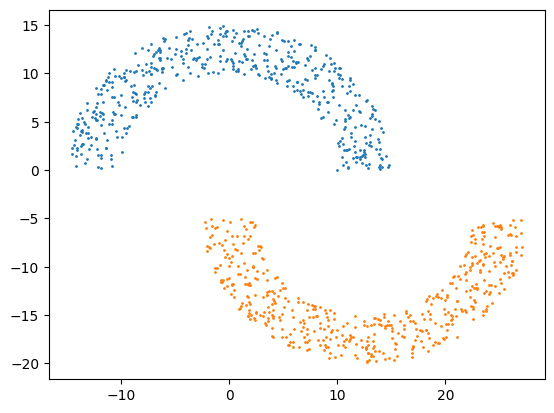

In [14]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [15]:
data_top = np.array(top)
labels_top = np.ones(data_top.shape[0])

data_bottom = np.array(bottom)
labels_bottom = -np.ones(data_bottom.shape[0])

data = np.vstack([data_top, data_bottom])
labels = np.hstack([labels_top, labels_bottom])

data = np.hstack((np.ones((data.shape[0], 1)), data))

In [17]:
def pla(X, Y, max_iter=1000):
    w = np.zeros(X.shape[1])
    iterations = 0

    for _ in range(max_iter):
        misclassified = False

        for i in range(X.shape[0]):
            if Y[i] * np.dot(w, X[i, :]) <= 0:
                w = w + Y[i] * X[i, :]
                misclassified = True
                iterations += 1

        if not misclassified:
            break
    return w, iterations

w, iterations = pla(data, labels)
print(f"PLA converged after {iterations} iterations.")
print(w)

PLA converged after 6 iterations.
[ 6.         -0.35366637 16.40962812]


In [18]:
def linear_regression(data, labels):
    x_t = np.transpose(data)
    xt_x = np.matmul(x_t, data)
    xtx_inv = np.linalg.inv(xt_x)
    xt_x_x = np.matmul(xtx_inv, x_t)
    w = np.matmul(xt_x_x, labels)

    return w

w_lr = linear_regression(data, labels)
w_lr

array([ 0.25099181, -0.00921574,  0.07777424])

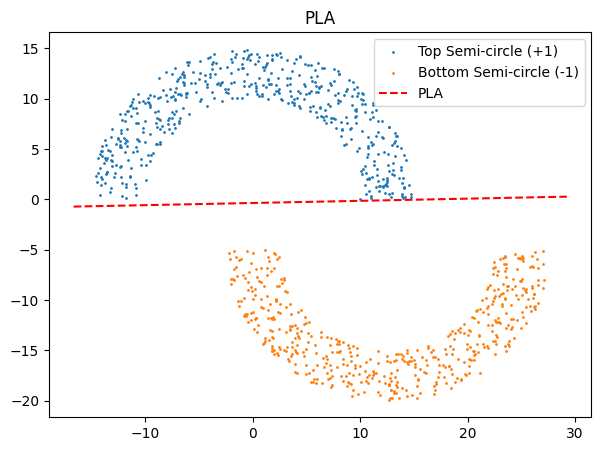

In [19]:
def plot_data_and_boundary(w, title):
    plt.figure(figsize=(7, 5))

    plt.scatter(X1,Y1,s = 1, label='Top Semi-circle (+1)')
    plt.scatter(X2,Y2,s = 1, label='Bottom Semi-circle (-1)')

    axes = plt.gca()
    x = np.array(axes.get_xlim())
    y = -w[0]/w[2] - w[1]/w[2] * x
    plt.plot(x, y, '--', c ='red', label=title)

    plt.title(title)
    plt.legend()
    plt.show()

# LP 1 (a)
plot_data_and_boundary(w, "PLA")

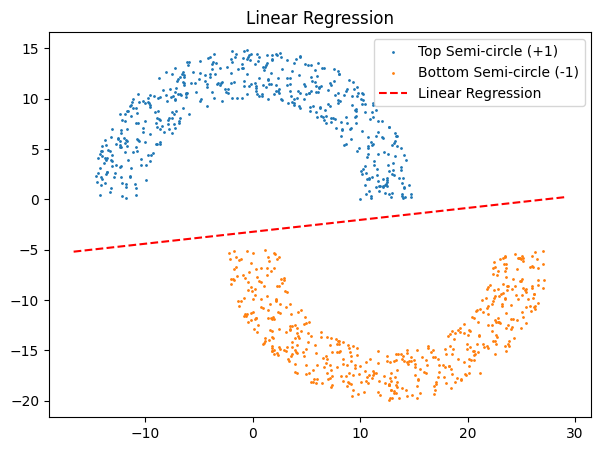

In [20]:
# LP 1 (b)
plot_data_and_boundary(w_lr, "Linear Regression")

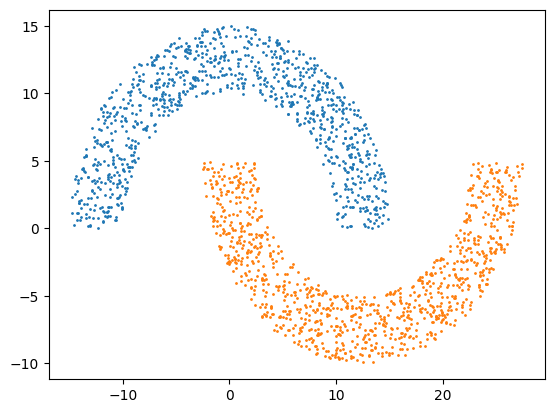

In [26]:
top,bottom = generatedata(rad,thk,sep=-5,n=2000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [27]:
data_top = np.array(top)
labels_top = np.ones(data_top.shape[0])

data_bottom = np.array(bottom)
labels_bottom = -np.ones(data_bottom.shape[0])

data = np.vstack([data_top, data_bottom])
labels = np.hstack([labels_top, labels_bottom])

data = np.hstack((np.ones((data.shape[0], 1)), data))

In [29]:
def pocket_algorithm(data, labels, max_iter=100000):

    weights = np.zeros(data.shape[1])
    pocket_weights = np.copy(weights)

    errors = []

    initial_error = np.mean(np.sign(np.dot(data, weights)) != labels)
    errors.append(initial_error)
    pocket_error = initial_error


    for _ in range(max_iter):

        misclassified = np.where(np.sign(np.dot(data, weights)) != labels)[0]

        if len(misclassified) == 0:
            break

        random_index = np.random.choice(misclassified)
        weights += labels[random_index] * data[random_index]

        current_error = np.mean(np.sign(np.dot(data, weights)) != labels)
        errors.append(current_error)

        if current_error < pocket_error:
            pocket_weights = np.copy(weights)
            pocket_error = current_error

    return pocket_weights, errors

w_pocket, error_history = pocket_algorithm(data, labels, max_iter=100000)
w_pocket

array([-55.        ,  -4.72742893,  33.97903523])

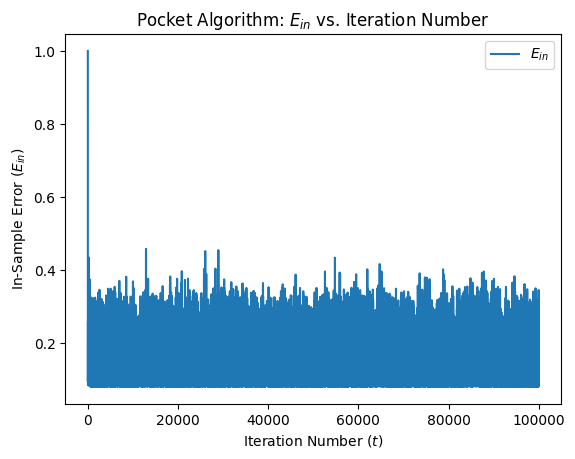

In [30]:
# Plotting Ein vs. iteration number t
plt.plot(error_history, label=r'$E_{in}$')
plt.xlabel("Iteration Number ($t$)")
plt.ylabel(r"In-Sample Error ($E_{in}$)")
plt.title(r"Pocket Algorithm: $E_{in}$ vs. Iteration Number")
plt.legend()
plt.show()

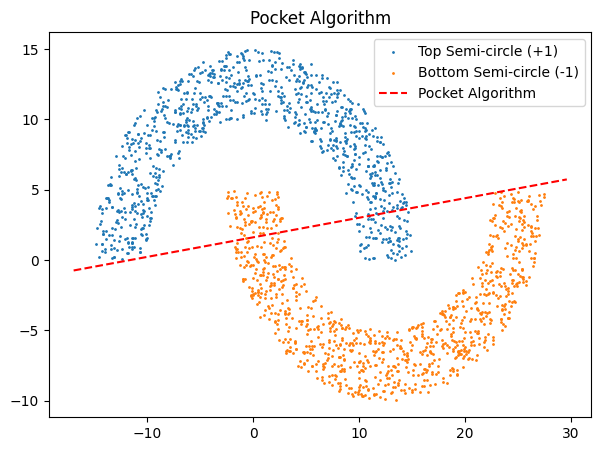

In [31]:
# LP 2 (c)
plot_data_and_boundary(w_pocket, "Pocket Algorithm")

In [32]:
import time
# Compute E_in
def compute_error(w, X, y):
    return np.mean(np.sign(np.dot(X,w)) != y)

# Linear Regression
start_time = time.time()
w_linreg = linear_regression(data, labels)
linreg_time = time.time() - start_time
linreg_error = compute_error(w_linreg, data, labels)

start_time = time.time()
w_pocket, error = pocket_algorithm(data, labels, max_iter=100000)
pocket_time = time.time() - start_time
pocket_error = compute_error(w_pocket, data, labels)

# HP 2 (d)
print(f"Linear Regression: Time taken = {linreg_time:.5f} seconds, E_in = {linreg_error:.5f}")
print(f"Pocket Algorithm: Time taken = {pocket_time:.5f} seconds, E_in = {pocket_error:.5f}")

print("\nLinear regression typically runs faster than the Pocket algorithm especially for large iteration counts. ")
print("This is because linear regression uses a direct mathematical approach, while the Pocket algorithm involves iterative improvements over many iterations.")

Linear Regression: Time taken = 0.00557 seconds, E_in = 0.09150
Pocket Algorithm: Time taken = 7.89782 seconds, E_in = 0.08000

Linear regression typically runs faster than the Pocket algorithm especially for large iteration counts. 
This is because linear regression uses a direct mathematical approach, while the Pocket algorithm involves iterative improvements over many iterations.


In [ ]:
# # Third-order polynomial feature transformation
# def transform_features(x):
#     X1 = x[:, 1]
#     X2 = x[:, 2]
#     transformed = np.column_stack([
#         x[:, 0],  # Bias term
#         X1,
#         X2,
#         X1**2,
#         X2**2,
#         X1*X2,
#         X1**3,
#         X2**3,
#         X1**2*X2,
#         X1*X2**2
#     ])
#     return transformed

# X_transformed = transform_features(data)
# X_transformed[:5]

In [33]:
from sklearn.preprocessing import PolynomialFeatures
# Extracting original features without bias term
original_data = data[:, 1:]

# Creating 3rd order polynomial features using sklearn
poly_transformer = PolynomialFeatures(degree=3, include_bias=True)
poly_data = poly_transformer.fit_transform(original_data)

poly_data.shape, poly_data[: 3]

((2000, 10),
 array([[ 1.00000000e+00,  1.26575966e+01,  3.47251017e+00,
          1.60214751e+02,  4.39536328e+01,  1.20583269e+01,
          2.02793367e+03,  5.56347351e+02,  1.52629437e+02,
          4.18726628e+01],
        [ 1.00000000e+00, -1.23973799e+01,  4.69052660e+00,
          1.53695028e+02, -5.81502401e+01,  2.20010398e+01,
         -1.90541565e+03,  7.20910616e+02, -2.72755248e+02,
          1.03196462e+02],
        [ 1.00000000e+00, -5.89585858e+00,  1.05396240e+01,
          3.47611484e+01, -6.21401324e+01,  1.11083673e+02,
         -2.04946815e+02,  3.66369433e+02, -6.54933628e+02,
          1.17078014e+03]]))

In [34]:
w_pocket_transformed, error_history_transformed = pocket_algorithm(poly_data, labels, max_iter=100000)
w_pocket_transformed

array([ -82756.        ,  -65030.57024707,  -31703.52544161,
        159137.94773056,  104116.64389022, -174682.68977455,
        -10897.21405911,    8644.37085636,  -10052.80972139,
         18066.2384176 ])

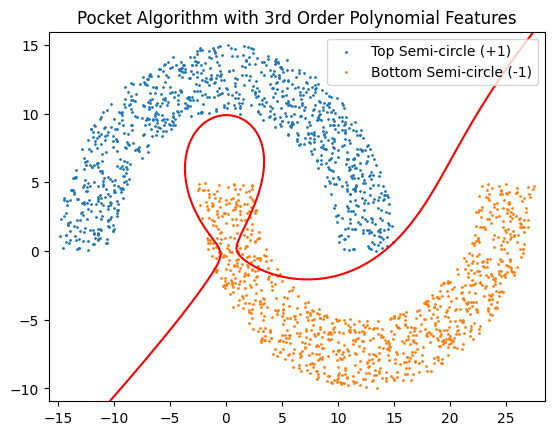

In [35]:
plt.scatter(X1,Y1,s = 1, label='Top Semi-circle (+1)')
plt.scatter(X2,Y2,s = 1, label='Bottom Semi-circle (-1)')

x_min, x_max = data[:, 1].min() - 1, data[:, 1].max() + 1
y_min, y_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly_transformer.transform(grid)

Z = np.dot(grid_poly[:, 1:], w_pocket_transformed[1:]) + w_pocket_transformed[0]
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], colors='red')

plt.title("Pocket Algorithm with 3rd Order Polynomial Features")
plt.legend(loc='upper right')
plt.show()
#plot4poly(w_pocket_transformed[0],w_pocket_transformed[1],w_pocket_transformed[2],w_pocket_transformed[3])

In [36]:
w_lr_transformed = linear_regression(poly_data, labels)
w_lr_transformed

array([-8.80105722e-01,  1.76074239e-02,  1.28385169e-01,  8.96453839e-03,
        1.25290191e-02,  1.48105438e-02, -3.95350649e-04, -5.54098442e-04,
       -1.09211710e-03, -1.04653989e-03])

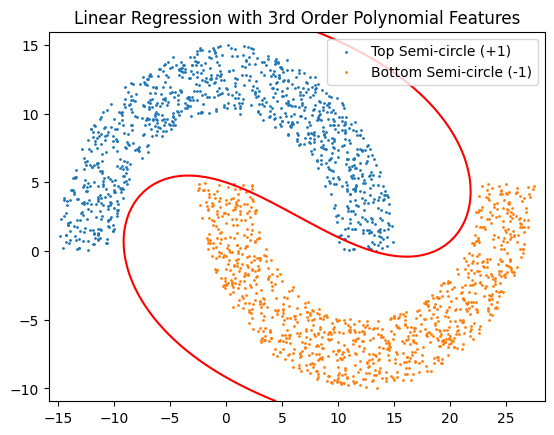

In [37]:
plt.scatter(X1,Y1,s = 1, label='Top Semi-circle (+1)')
plt.scatter(X2,Y2,s = 1, label='Bottom Semi-circle (-1)')

x_min, x_max = data[:, 1].min() - 1, data[:, 1].max() + 1
y_min, y_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly_transformer.transform(grid)

Z = np.dot(grid_poly[:, 1:], w_lr_transformed[1:]) + w_lr_transformed[0]
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], colors='red')

plt.title("Linear Regression with 3rd Order Polynomial Features")
plt.legend(loc='upper right')
plt.show()

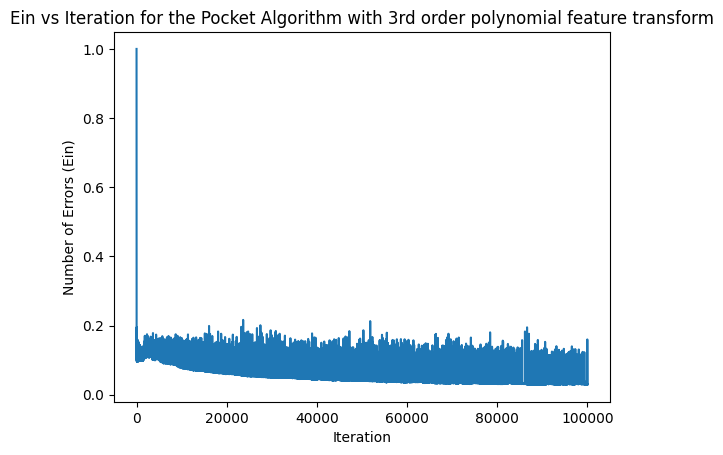

In [38]:
plt.plot(error_history_transformed)
plt.xlabel('Iteration')
plt.ylabel('Number of Errors (Ein)')
plt.title('Ein vs Iteration for the Pocket Algorithm with 3rd order polynomial feature transform')
plt.show()

In [39]:
# Linear Regression with 3rd order polynomial feature transform
start_time = time.time()
w_linreg_transformed = linear_regression(poly_data, labels)
linreg_time_transformed = time.time() - start_time
linreg_error_transformed = compute_error(w_linreg_transformed, poly_data, labels)

# Pocket Algorithm with 3rd order polynomial feature transform
start_time = time.time()
w_pocket_transformed, _ = pocket_algorithm(poly_data, labels, max_iter=100000)
pocket_time_transformed = time.time() - start_time
pocket_error_transformed = compute_error(w_pocket_transformed, poly_data, labels)

print(f"Linear Regression with 3rd order polynomial feature transform: Time taken = {linreg_time_transformed:.5f} seconds, E_in = {linreg_error_transformed:.5f}")
print(f"Pocket Algorithm with 3rd order polynomial feature transform: Time taken = {pocket_time_transformed:.5f} seconds, E_in = {pocket_error_transformed:.5f}")

print("\nUsing a 3rd order polynomial feature transform can capture more complex relationships in the data. However, it also introduces the risk of overfitting, especially with a limited number of data points.")


Linear Regression with 3rd order polynomial feature transform: Time taken = 0.00062 seconds, E_in = 0.00550
Pocket Algorithm with 3rd order polynomial feature transform: Time taken = 15.62282 seconds, E_in = 0.02750

Using a 3rd order polynomial feature transform can capture more complex relationships in the data. However, it also introduces the risk of overfitting, especially with a limited number of data points.
